<span style="font-size: 1.5em;">Tree Search and Genetic Algorithm</span> 
---
<hr style="border: none; border-top: 3px solid black;">

## ◎ **$\texttt{Description}$** 

>In this code, a game tree is constructed and various algorithms such as Minimax and Alpha-beta pruning are applied to find the best move in the tree. Additionally, a genetic algorithm is implemented to optimize the values of the leaf nodes in the tree.


In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, HTML

    Set display width for better visualization

In [2]:
display(HTML("<style>.container { width:95% !important; }</style>"))


##  ◎  $\texttt{Node Class}$ 

- **The Node class is defined with the following attributes:** <br><br>
    - `value`: A value associated with the node (default is `None`).
    - `children`: A list of child nodes (default is an empty list).
    - `name`: A string representing the name of the node (default is `None`).


In [3]:
class Node:
    def __init__(self, value=None, children=None, name=None):
        self.value = value
        self.children = children or []
        self.name = name

<br>

##  ◎ $\texttt{Tree Class and it's related functions}$ 

* **The Tree class contains methods for implementing the Minimax and Alpha-beta pruning algorithms to find the best move in the snooker simulation tree.**

---
<br>

###  *`__init__`*
>The constructor method initializes the root attribute of the tree.

---

### *`min_max`*
>This method implements the Minimax algorithm to find the best move in the game tree. It takes in a node object, a bool is_maximizing to determine if the current   player is maximizing or minimizing, and a path list to keep track of the path to the best move. The method returns the value of the best move and the path to it.

---

### *`Alpha_beta_pruning`*
>This method implements the Alpha-beta pruning algorithm to find the best move in the game tree. It takes in a node object, alpha and beta values, a boolean is_maximizing to determine if the current player is maximizing or minimizing, a pruning_count to keep track of the number of nodes pruned, a path list to keep track of the path to the best move, and a pruned_nodes list to keep track of the nodes that are pruned. The method returns the value of the best move, the path to it, and the number of pruned nodes.

---

### *`find_best_move`*
>This method finds the best move in the game tree using either the Minimax or Alpha-beta pruning algorithm. It takes in a node object and a boolean use_alpha_beta to determine which algorithm to use. The method returns the best move, its value, the path to it, and the number of pruned nodes (if Alpha-beta pruning is used).

<br>

In [4]:
class Tree:
    def __init__(self, root):
        self.root = root

    def min_max(self, node, is_maximizing, path):
        if not node.children:
            return node.value, path

        if is_maximizing:
            max_value = float('-inf')
            max_path = None
            for child in node.children:
                child_value, child_path = self.min_max(child, False, path + [child.name])
                if child_value > max_value:
                    max_value = child_value
                    max_path = child_path
            return max_value, max_path
        else:
            min_value = float('inf')
            min_path = None
            for child in node.children:
                child_value, child_path = self.min_max(child, True, path + [child.name])
                if child_value < min_value:
                    min_value = child_value
                    min_path = child_path
            return min_value, min_path

    def alpha_beta_pruning(self, node, alpha, beta, is_maximizing, pruning_count, path, pruned_nodes):
        if not node.children:
            return node.value, path, pruning_count

        if is_maximizing:
            max_value = float('-inf')
            max_path = None
            for child in node.children:
                child_value, child_path, pruning_count = self.alpha_beta_pruning(child, alpha, beta, False, pruning_count, path + [child.name], pruned_nodes)
                if child_value > max_value:
                    max_value = child_value
                    max_path = child_path
                alpha = max(alpha, max_value)
                if beta <= alpha:
                    pruned_nodes.append(child.name)  # Store pruned nodes
                    pruning_count += 1
                    break
            return max_value, max_path, pruning_count
        else:
            min_value = float('inf')
            min_path = None
            for child in node.children:
                child_value, child_path, pruning_count = self.alpha_beta_pruning(child, alpha, beta, True, pruning_count, path + [child.name], pruned_nodes)
                if child_value < min_value:
                    min_value = child_value
                    min_path = child_path
                beta = min(beta, min_value)
                if beta <= alpha:
                    pruned_nodes.append(child.name)  # Store pruned nodes
                    pruning_count += 1
                    break
            return min_value, min_path, pruning_count

    def find_best_move(self, node, use_alpha_beta=False):
        best_move = None
        best_value = float('-inf')
        best_path = None
        pruning_count = 0
        pruned_nodes = []

        for child in node.children:
            if use_alpha_beta:
                child_value, child_path, pruning_count = self.alpha_beta_pruning(child, float('-inf'), float('inf'), False, pruning_count, [child.name], pruned_nodes)
            else:
                child_value, child_path = self.min_max(child, False, [child.name])

            if child_value > best_value:
                best_value = child_value
                best_move = child
                best_path = child_path

        if use_alpha_beta:
            # Print pruning logs
            print(f"Total prunings: {pruning_count}")
            print("Pruned Nodes:", ", ".join(pruned_nodes))

        return best_move, best_value, best_path, pruning_count



### *`set_leaf_values`*
>This function sets new values to the leaf nodes of the game tree. It takes in a tree object and a new_values list containing the new values for the leaf nodes. The function recursively updates the values of the leaf nodes in the tree by traversing it using a depth-first search approach.

### *`update_leaf_values`*
>This inner function updates the value of a leaf node and returns the index of the next value in the new_values list that should be assigned. If the current node is not a leaf node, the function recursively calls itself on each child node. The index of the next value in the list is passed along with each recursive call to ensure that each leaf node is assigned a unique value.

In [5]:
def set_leaf_values(tree, new_values):
    
    def update_leaf_values(node, value_index):
        if not node.children:  # Leaf node condition
            node.value = new_values[value_index]
            return value_index + 1

        for child in node.children:
            value_index = update_leaf_values(child, value_index)

        return value_index

    update_leaf_values(tree.root, 0)

### *`visualize_tree`*
>This function visualizes the game tree using NetworkX and Matplotlib libraries. It takes in a node object representing the root of the tree and creates a graph with edges between nodes. It then positions the nodes using the spring layout algorithm and labels them with their name and value. Finally, it displays the graph using Matplotlib.

In [6]:
def visualize_tree(node):
    '''plot the graph by getting it's root'''
    G = nx.Graph()
    
    def add_edges(n):
        for child in n.children:
            G.add_edge(n, child)
            add_edges(child)
    
    add_edges(node)
    
    pos = nx.spring_layout(G)
    labels = {n: f"{n.name}: {n.value}" for n in G.nodes()}
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=1000, font_size=7)
    plt.title("Tree Visualization")
    plt.show()

### *`print_best_move`*
>This function finds the best move in the game tree for the root player using both Minimax and Alpha-beta pruning algorithms, and prints the results. It visualizes the game tree using visualize_tree, finds the best move and corresponding value and path using tree.find_best_move, and prints them using formatted strings.

In [7]:
# Find the best move using Minimax
def print_best_move(root):

    visualize_tree(root)
    print()
    best_move, best_value, best_path, pruning_count = tree.find_best_move(root)

    print(f"Best move for root player (minimax): {best_move.name}, value: {best_value}")
    print("Path:", "->".join(best_path))

    print()
    print('______________________________________________________________')
    print()

    # Find the best move using Alpha-beta pruning
    best_move_alpha_beta, best_value_alpha_beta, best_path_alpha_beta, pruning_count_alpha_beta = tree.find_best_move(root, use_alpha_beta=True)

    print(f"Best move for root player (alpha-beta pruning): {best_move_alpha_beta.name}, value: {best_value_alpha_beta}")
    print("Path:", "->".join(best_path_alpha_beta))
    

##  ◎  $\texttt{Example input}$ 

In [8]:
root = Node(name="root", children=[
    
        Node(name="A", children=[
        
                Node(name="AA", children=[
                    Node(name="AAA", children=[Node(name="AAAA"),Node(name="AAAB")]),
                    Node(name="AAB", children=[Node(name="AABA"),Node(name="AABB")])
                ]),
        
                Node(name="AB", children=[
                    Node(name="ABA", children=[Node(name="ABAA"),Node(name="ABAB")]),
                    Node(name="ABB", children=[Node(name="ABBA"),Node(name="ABBB")])
                ]),
            ]),
    
        Node(name="B", children=[
                Node(name="BA", children=[
                    Node(name="BAA", children=[Node(name="BAAA"),Node(name="BAAB")]),
                    Node(name="BAB", children=[Node(name="BABA"),Node(name="BABB")])
        ]),
                Node(name="BB", children=[
                    Node(name="BBA", children=[Node(name="BAAA"),Node(name="BAAB")]),
                    Node(name="BBB", children=[Node(name="BBBA"),Node(name="BBBB")])
        ])
    ])
])

tree = Tree(root)


---
# <span style="font-size: 2em;">Ⅰ. Part A</span> 



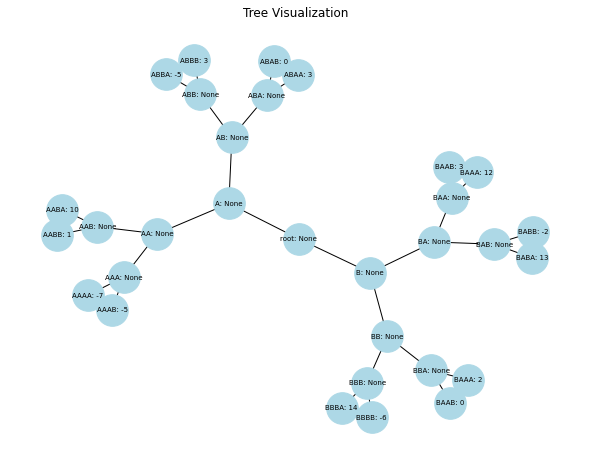


Best move for root player (minimax): A, value: 0
Path: A->AB->ABA->ABAB

______________________________________________________________

Total prunings: 3
Pruned Nodes: ABBA, BABB, BBBB
Best move for root player (alpha-beta pruning): A, value: 0
Path: A->AB->ABA->ABAB


In [30]:
leaf_values = [random.randint(-10, 15) for _ in range(16)]
set_leaf_values(tree, leaf_values )
print_best_move(tree.root)


---
# <span style="font-size: 2em;">Ⅱ. Part B</span> 



##  ◎  $\texttt{Genetic Algorithm}$  

* **This function performs the genetic algorithm to find the best set of leaf values for the game tree. It starts by generating an initial population of size initial_population_size using the `generate_initial_population` function. It then iterates for max_generations generations, selecting parents using the `selection` function, creating children using the `crossover` function, and mutating the children using the `mutation` function. The new population is then used for the next generation. Finally, the function returns the individual with the highest fitness score.**
---
<br>


### *`generate_initial_population`*

>This function generates an initial population of `population_size` individuals for the genetic algorithm. Each individual is a list of length `num_leaves` containing randomly generated values in the range of -10 to 15.

---

### *`calculate_fitness`*

>This function calculates the fitness of an individual in the genetic algorithm by setting the leaf values in the game tree to `leaf_values`, finding the best move using the Minimax algorithm, and returning the corresponding value. It calls the `set_leaf_values` and `tree.find_best_move` methods of the `tree` object to perform these operations.

---

### *`selection`*

>This function performs selection by choosing two individuals from the `population` list with a probability proportional to their fitness scores. It uses the `random.choices` function to perform the selection.

---

### *`crossover`*

>This function performs crossover between two parents with a probability of `crossover_rate`. It chooses a random crossover point and generates two children by swapping the values of the parents before and after the crossover point.

---

### *`mutation`*

>This function performs mutation on an individual with a probability of `mutation_rate` for each value. It generates a random value in the range of -10 to 15 to replace the original value.


In [10]:
def generate_initial_population(population_size, num_leaves):
    return [[random.randint(-10, 15) for _ in range(num_leaves)] for _ in range(population_size)]

def calculate_fitness(tree, leaf_values):
    set_leaf_values(tree, leaf_values)
    _, best_value, _, _ = tree.find_best_move(tree.root, use_alpha_beta=False)
    return best_value

def selection(population, fitness_scores):
    return random.choices(population, weights=fitness_scores, k=2)

def crossover(parent1, parent2, crossover_rate):
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2
    else:
        return parent1, parent2

def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = random.randint(-10, 15)
    return individual

In [11]:
def genetic_algorithm(tree, initial_population_size, mutation_rate, crossover_rate, max_generations):
    population = generate_initial_population(initial_population_size, 16)
    for generation in range(max_generations):
        fitness_scores = [calculate_fitness(tree, individual) for individual in population]
        new_population = []
        for _ in range(initial_population_size // 2):
            parent1, parent2 = selection(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            child1 = mutation(child1, mutation_rate)
            child2 = mutation(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population

    best_individual = max(population, key=lambda x: calculate_fitness(tree, x))
    return best_individual

Optimized leaf values: [13, 13, -3, -5, 13, 14, 6, 13, 15, 15, -7, 13, 14, 14, 15, 5]


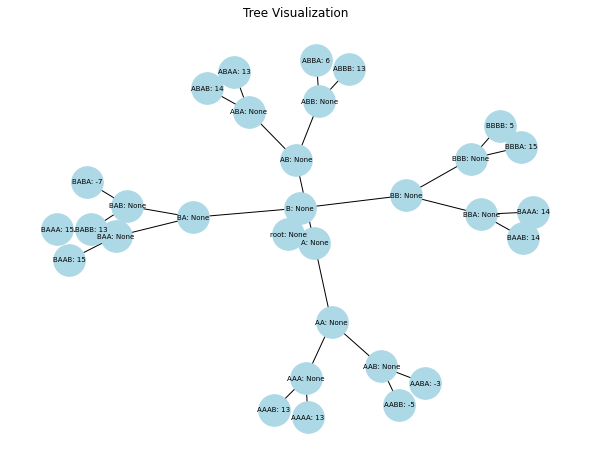


Best move for root player (minimax): B, value: 14
Path: B->BB->BBA->BAAA

______________________________________________________________

Total prunings: 4
Pruned Nodes: AABA, ABA, BABA, BBBB
Best move for root player (alpha-beta pruning): B, value: 14
Path: B->BB->BBA->BAAA


In [12]:
# Run the genetic algorithm
optimized_leaf_values = genetic_algorithm(tree, 100, 0.1, 0.8, 50)
print("Optimized leaf values:", optimized_leaf_values)
set_leaf_values(tree, optimized_leaf_values )
print_best_move(tree.root)